In [61]:
!pip install apriori_python

In [62]:
from apriori_python import apriori
import pandas as pd

df = pd.read_excel("20_transactions.xlsx", sheet_name="Лист1", header=None)
data = df.values.tolist()
transactions = [[item for item in sublist if item == item] for sublist in data]

freqItemSet, rules = apriori(transactions, minSup=0.25, minConf=0.5)

In [63]:
rules

[[{'Туфли'}, {'Рубашка'}, 0.5454545454545454],
 [{'Брюки'}, {'Рубашка'}, 0.5454545454545454],
 [{'Футболка'}, {'Джинсы'}, 0.625],
 [{'Футболка'}, {'Кроссовки'}, 0.625],
 [{'Ремень'}, {'Джинсы'}, 0.625],
 [{'Рубашка'}, {'Туфли'}, 0.6666666666666666],
 [{'Рубашка'}, {'Брюки'}, 0.6666666666666666],
 [{'Джинсы'}, {'Футболка'}, 0.7142857142857143],
 [{'Джинсы'}, {'Ремень'}, 0.7142857142857143],
 [{'Туфли'}, {'Брюки'}, 0.7272727272727273],
 [{'Брюки'}, {'Туфли'}, 0.7272727272727273],
 [{'Кроссовки'}, {'Футболка'}, 1.0]]

In [64]:
freqItemSet

{1: {frozenset({'Куртка'}),
  frozenset({'Брюки'}),
  frozenset({'Футболка'}),
  frozenset({'Кроссовки'}),
  frozenset({'Джинсы'}),
  frozenset({'Туфли'}),
  frozenset({'Ремень'}),
  frozenset({'Рубашка'})},
 2: {frozenset({'Рубашка', 'Туфли'}),
  frozenset({'Брюки', 'Туфли'}),
  frozenset({'Джинсы', 'Футболка'}),
  frozenset({'Кроссовки', 'Футболка'}),
  frozenset({'Брюки', 'Рубашка'}),
  frozenset({'Джинсы', 'Ремень'})}}

In [65]:
!pip install efficient-apriori

In [66]:
from efficient_apriori import apriori
import pandas as pd

df = pd.read_excel("20_transactions.xlsx", sheet_name="Лист1", header=None)
data = df.values.tolist()
transactions = [[item for item in sublist if item == item] for sublist in data]

freqItemSet, rules = apriori(transactions, min_support=0.25, min_confidence=0.5)

In [67]:
rules

[{Рубашка} -> {Брюки},
 {Брюки} -> {Рубашка},
 {Туфли} -> {Брюки},
 {Брюки} -> {Туфли},
 {Ремень} -> {Джинсы},
 {Джинсы} -> {Ремень},
 {Футболка} -> {Джинсы},
 {Джинсы} -> {Футболка},
 {Футболка} -> {Кроссовки},
 {Кроссовки} -> {Футболка},
 {Туфли} -> {Рубашка},
 {Рубашка} -> {Туфли}]

In [68]:
freqItemSet

{1: {('Футболка',): 8,
  ('Джинсы',): 7,
  ('Куртка',): 5,
  ('Ремень',): 8,
  ('Рубашка',): 9,
  ('Брюки',): 11,
  ('Туфли',): 11,
  ('Кроссовки',): 5},
 2: {('Брюки', 'Рубашка'): 6,
  ('Брюки', 'Туфли'): 8,
  ('Джинсы', 'Ремень'): 5,
  ('Джинсы', 'Футболка'): 5,
  ('Кроссовки', 'Футболка'): 5,
  ('Рубашка', 'Туфли'): 6}}

In [69]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.confidence):
  print(rule)

{Брюки} -> {Рубашка} (conf: 0.545, supp: 0.300, lift: 1.212, conv: 1.210)
{Туфли} -> {Рубашка} (conf: 0.545, supp: 0.300, lift: 1.212, conv: 1.210)
{Ремень} -> {Джинсы} (conf: 0.625, supp: 0.250, lift: 1.786, conv: 1.733)
{Футболка} -> {Джинсы} (conf: 0.625, supp: 0.250, lift: 1.786, conv: 1.733)
{Футболка} -> {Кроссовки} (conf: 0.625, supp: 0.250, lift: 2.500, conv: 2.000)
{Рубашка} -> {Брюки} (conf: 0.667, supp: 0.300, lift: 1.212, conv: 1.350)
{Рубашка} -> {Туфли} (conf: 0.667, supp: 0.300, lift: 1.212, conv: 1.350)
{Джинсы} -> {Ремень} (conf: 0.714, supp: 0.250, lift: 1.786, conv: 2.100)
{Джинсы} -> {Футболка} (conf: 0.714, supp: 0.250, lift: 1.786, conv: 2.100)
{Туфли} -> {Брюки} (conf: 0.727, supp: 0.400, lift: 1.322, conv: 1.650)
{Брюки} -> {Туфли} (conf: 0.727, supp: 0.400, lift: 1.322, conv: 1.650)
{Кроссовки} -> {Футболка} (conf: 1.000, supp: 0.250, lift: 2.500, conv: 600000000.000)


In [70]:
!pip install fpgrowth_py

In [71]:
from fpgrowth_py import fpgrowth

freqItemSet, rules = fpgrowth(transactions, minSupRatio=0.25, minConf=0.5)

In [72]:
rules

[[{'Футболка'}, {'Кроссовки'}, 0.625],
 [{'Кроссовки'}, {'Футболка'}, 1.0],
 [{'Ремень'}, {'Джинсы'}, 0.625],
 [{'Джинсы'}, {'Ремень'}, 0.7142857142857143],
 [{'Футболка'}, {'Джинсы'}, 0.625],
 [{'Джинсы'}, {'Футболка'}, 0.7142857142857143],
 [{'Туфли'}, {'Рубашка'}, 0.5454545454545454],
 [{'Рубашка'}, {'Туфли'}, 0.6666666666666666],
 [{'Рубашка'}, {'Брюки'}, 0.6666666666666666],
 [{'Брюки'}, {'Рубашка'}, 0.5454545454545454],
 [{'Туфли'}, {'Брюки'}, 0.7272727272727273],
 [{'Брюки'}, {'Туфли'}, 0.7272727272727273]]

In [73]:
freqItemSet

[{'Куртка'},
 {'Кроссовки'},
 {'Кроссовки', 'Футболка'},
 {'Джинсы'},
 {'Джинсы', 'Ремень'},
 {'Джинсы', 'Футболка'},
 {'Футболка'},
 {'Ремень'},
 {'Рубашка'},
 {'Рубашка', 'Туфли'},
 {'Брюки', 'Рубашка'},
 {'Брюки'},
 {'Туфли'},
 {'Брюки', 'Туфли'}]

In [74]:
import pandas as pd

url = 'https://raw.githubusercontent.com/viktree/curly-octo-chainsaw/master/BreadBasket_DMS.csv'
df = pd.read_csv(url)
df = df[df['Item'] != 'NONE']
transaction_table = df.groupby('Transaction')['Item'].apply(list).reset_index()
transactions = transaction_table['Item'].tolist()
transaction_table

,Transaction,Item
0,1,[Bread]
1,2,"[Scandinavian, Scandinavian]"
2,3,"[Hot chocolate, Jam, Cookies]"
3,4,[Muffin]
4,5,"[Coffee, Pastry, Bread]"
...,...,...
9460,9680,[Bread]
9461,9681,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9462,9682,"[Muffin, Tacos/Fajita, Coffee, Tea]"
9463,9683,"[Coffee, Pastry]"


In [75]:
import time
from apriori_python import apriori

start_time = time.time()
freqItemSet_apriori60, rules_apriori60 = apriori(transactions, minSup=0.001, minConf=0.6)
end_time = time.time()
execution_time_apriori_python_60 = end_time - start_time

print(f"Время выполнения: {execution_time_apriori_python_60} секунд")

rules_apriori60

Время выполнения: 13.345468282699585 секунд


[[{'Cake', 'Hot chocolate'}, {'Coffee'}, 0.6018518518518519],
 [{'Cookies', 'Juice'}, {'Coffee'}, 0.603448275862069],
 [{'Bakewell'}, {'Coffee'}, 0.6041666666666666],
 [{'Granola'}, {'Coffee'}, 0.6071428571428571],
 [{'Cookies', 'Pastry'}, {'Coffee'}, 0.6071428571428571],
 [{'Hot chocolate', 'Scone'}, {'Coffee'}, 0.6071428571428571],
 [{'Medialuna', 'Toast'}, {'Coffee'}, 0.6111111111111112],
 [{'Cookies', 'Hot chocolate'}, {'Coffee'}, 0.6140350877192983],
 [{'Brownie', 'Cookies'}, {'Coffee'}, 0.625],
 [{'Salad'}, {'Coffee'}, 0.6262626262626263],
 [{'Tartine'}, {'Coffee'}, 0.6304347826086957],
 [{'Juice', 'Scone'}, {'Coffee'}, 0.631578947368421],
 [{'Brownie', 'Sandwich'}, {'Coffee'}, 0.6363636363636364],
 [{'Hot chocolate', 'Medialuna'}, {'Coffee'}, 0.6444444444444445],
 [{'Keeping It Local', 'Tea'}, {'Coffee'}, 0.6470588235294118],
 [{'Muffin', 'Sandwich'}, {'Coffee'}, 0.65],
 [{'Jammie Dodgers', 'Juice'}, {'Coffee'}, 0.65],
 [{'Medialuna', 'Sandwich'}, {'Coffee'}, 0.65],
 [{'Alfajore

In [76]:
import time
from apriori_python import apriori

start_time = time.time()
freqItemSet_apriori80, rules_apriori80 = apriori(transactions, minSup=0.001, minConf=0.8)
end_time = time.time()
execution_time_apriori_python_80 = end_time - start_time

print(f"Время выполнения: {execution_time_apriori_python_80} секунд")

rules_apriori80

Время выполнения: 9.730512380599976 секунд


[[{'Keeping It Local'}, {'Coffee'}, 0.8095238095238095],
 [{'Extra Salami or Feta'}, {'Coffee'}, 0.8157894736842105],
 [{'Cake', 'Vegan mincepie'}, {'Coffee'}, 0.8333333333333334],
 [{'Salad', 'Sandwich'}, {'Coffee'}, 0.8333333333333334],
 [{'Hearty & Seasonal', 'Sandwich'}, {'Coffee'}, 0.8571428571428571],
 [{'Pastry', 'Toast'}, {'Coffee'}, 0.8666666666666667],
 [{'Extra Salami or Feta', 'Salad'}, {'Coffee'}, 0.875]]

In [77]:
import time
from fpgrowth_py import fpgrowth

start_time = time.time()
freqItemSet_fpgrowth60, rules_fpgrowth60 = fpgrowth(transactions, minSupRatio=0.0015, minConf=0.6)
end_time = time.time()
execution_time_fpgrowth_py_60 = end_time - start_time

print(f"Время выполнения: {execution_time_fpgrowth_py_60} секунд")

rules_fpgrowth60

Время выполнения: 6.551862001419067 секунд


[[{'Granola'}, {'Coffee'}, 0.6071428571428571],
 [{'Art Tray'}, {'Coffee'}, 0.6842105263157895],
 [{'Extra Salami or Feta', 'Salad'}, {'Coffee'}, 0.875],
 [{'Extra Salami or Feta'}, {'Coffee'}, 0.8157894736842105],
 [{'Extra Salami or Feta'}, {'Coffee'}, 0.8157894736842105],
 [{'Tartine'}, {'Coffee'}, 0.6304347826086957],
 [{'Bakewell'}, {'Coffee'}, 0.6041666666666666],
 [{'Keeping It Local'}, {'Coffee'}, 0.8095238095238095],
 [{'Cake', 'Salad'}, {'Coffee'}, 0.7692307692307693],
 [{'Salad', 'Sandwich'}, {'Coffee'}, 0.8333333333333334],
 [{'Salad'}, {'Coffee'}, 0.6262626262626263],
 [{'Salad'}, {'Coffee'}, 0.6262626262626263],
 [{'Jammie Dodgers', 'Juice'}, {'Coffee'}, 0.65],
 [{'Cake', 'Tiffin'}, {'Coffee'}, 0.6818181818181818],
 [{'Sandwich', 'Spanish Brunch'}, {'Coffee'}, 0.6666666666666666],
 [{'Juice', 'Spanish Brunch'}, {'Coffee'}, 0.7307692307692307],
 [{'Pastry', 'Toast'}, {'Coffee'}, 0.8666666666666667],
 [{'Medialuna', 'Toast'}, {'Coffee'}, 0.6111111111111112],
 [{'Juice', 'To

In [78]:
import time
from fpgrowth_py import fpgrowth

start_time = time.time()
freqItemSet_fpgrowth80, rules_fpgrowth80 = fpgrowth(transactions, minSupRatio=0.0015, minConf=0.8)
end_time = time.time()
execution_time_fpgrowth_py_80 = end_time - start_time

print(f"Время выполнения: {execution_time_fpgrowth_py_80} секунд")

rules_fpgrowth80

Время выполнения: 7.720067262649536 секунд


[[{'Extra Salami or Feta', 'Salad'}, {'Coffee'}, 0.875],
 [{'Extra Salami or Feta'}, {'Coffee'}, 0.8157894736842105],
 [{'Extra Salami or Feta'}, {'Coffee'}, 0.8157894736842105],
 [{'Keeping It Local'}, {'Coffee'}, 0.8095238095238095],
 [{'Salad', 'Sandwich'}, {'Coffee'}, 0.8333333333333334],
 [{'Pastry', 'Toast'}, {'Coffee'}, 0.8666666666666667]]

In [79]:
import time
from efficient_apriori import apriori

start_time = time.time()
freqItemSet_efficient60, rules_efficient60 = apriori(transactions, min_support=0.001, min_confidence=0.6)
end_time = time.time()
execution_time_efficient_apriori_60 = end_time - start_time

print(f"Время выполнения: {execution_time_efficient_apriori_60} секунд")

for rule in rules_efficient60:
    lhs = rule.lhs  # Левая часть правила
    rhs = rule.rhs  # Правая часть правила
    support = rule.support  # Поддержка
    confidence = rule.confidence  # Достоверность

    print(f"Правило: {lhs} => {rhs}")
    print(f"Поддержка: {support}")
    print(f"Достоверность: {confidence}")
    print(f"Значимость: {support*confidence}")
    print("-" * 40)

Время выполнения: 0.046892642974853516 секунд
Правило: ('Art Tray',) => ('Coffee',)
Поддержка: 0.002746962493396725
Достоверность: 0.6842105263157895
Значимость: 0.0018795006533767066
----------------------------------------
Правило: ('Bakewell',) => ('Coffee',)
Поддержка: 0.00306391970417327
Достоверность: 0.6041666666666666
Значимость: 0.0018511181546046838
----------------------------------------
Правило: ('Extra Salami or Feta',) => ('Coffee',)
Поддержка: 0.0032752245113576335
Достоверность: 0.8157894736842105
Значимость: 0.0026718936803180695
----------------------------------------
Правило: ('Granola',) => ('Coffee',)
Поддержка: 0.0017960908610670893
Достоверность: 0.6071428571428571
Значимость: 0.001090483737076447
----------------------------------------
Правило: ('Keeping It Local',) => ('Coffee',)
Поддержка: 0.005388272583201268
Достоверность: 0.8095238095238095
Значимость: 0.0043619349483057885
----------------------------------------
Правило: ('Salad',) => ('Coffee',)
Подде

In [80]:
import time
from efficient_apriori import apriori

start_time = time.time()
freqItemSet_efficient80, rules_efficient80 = apriori(transactions, min_support=0.001, min_confidence=0.8)
end_time = time.time()
execution_time_efficient_apriori_80 = end_time - start_time

print(f"Время выполнения: {execution_time_efficient_apriori_80} секунд")

for rule in rules_efficient80:
    lhs = rule.lhs  # Левая часть правила
    rhs = rule.rhs  # Правая часть правила
    support = rule.support  # Поддержка
    confidence = rule.confidence  # Достоверность

    print(f"Правило: {lhs} => {rhs}")
    print(f"Поддержка: {support}")
    print(f"Достоверность: {confidence}")
    print(f"Значимость: {support*confidence}")
    print("-" * 40)

Время выполнения: 0.0702049732208252 секунд
Правило: ('Extra Salami or Feta',) => ('Coffee',)
Поддержка: 0.0032752245113576335
Достоверность: 0.8157894736842105
Значимость: 0.0026718936803180695
----------------------------------------
Правило: ('Keeping It Local',) => ('Coffee',)
Поддержка: 0.005388272583201268
Достоверность: 0.8095238095238095
Значимость: 0.0043619349483057885
----------------------------------------
Правило: ('Cake', 'Vegan mincepie') => ('Coffee',)
Поддержка: 0.0010565240359218173
Достоверность: 0.8333333333333334
Значимость: 0.0008804366966015144
----------------------------------------
Правило: ('Extra Salami or Feta', 'Salad') => ('Coffee',)
Поддержка: 0.0014791336502905442
Достоверность: 0.875
Значимость: 0.0012942419440042261
----------------------------------------
Правило: ('Hearty & Seasonal', 'Sandwich') => ('Coffee',)
Поддержка: 0.0012678288431061807
Достоверность: 0.8571428571428571
Значимость: 0.0010867104369481548
--------------------------------------

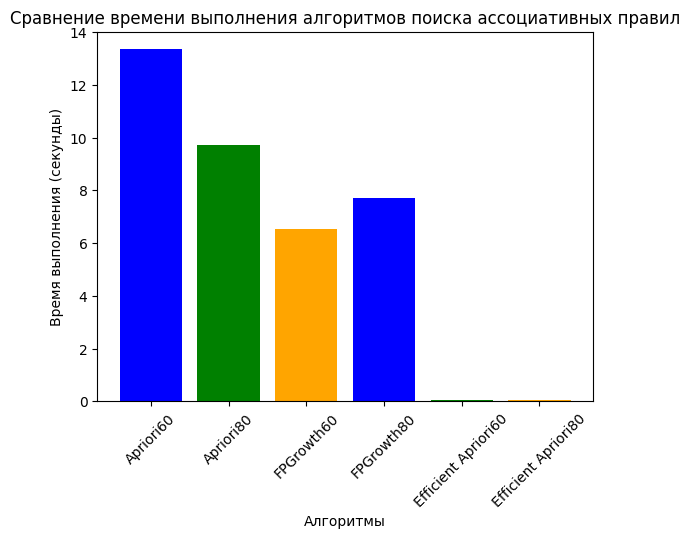

In [81]:
import matplotlib.pyplot as plt

algorithms = ['Apriori60',
              'Apriori80',
              'FPGrowth60',
              'FPGrowth80',
              'Efficient Apriori60',
              'Efficient Apriori80']
execution_times = [execution_time_apriori_python_60,
                   execution_time_apriori_python_80,
                   execution_time_fpgrowth_py_60,
                   execution_time_fpgrowth_py_80,
                   execution_time_efficient_apriori_60,
                   execution_time_efficient_apriori_80]

plt.bar(algorithms, execution_times, color=['blue', 'green', 'orange'])
plt.xticks(rotation=45)
plt.xlabel('Алгоритмы')
plt.ylabel('Время выполнения (секунды)')
plt.title('Сравнение времени выполнения алгоритмов поиска ассоциативных правил')
plt.show()

In [82]:
!pip install pyarmviz

In [84]:
# from PyARMViz import PyARMViz

# rules_df = pd.DataFrame(rules_apriori, columns=['lhs', 'rhs', 'confidence'])
# rules_df['lift'] = [rule.lift for rule in rules_apriori]  # Добавляем значимость (если доступно)

# # Визуализация правил
# plot_rules(rules_df, measure='confidence', threshold=0.5)

TypeError: Parameters to generic types must be types. Got <module 'PyARMViz.Rule' from '/usr/local/lib/python3.10/dist-packages/PyARMViz/Rule.py'>.